In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0.2 is required
import sklearn
assert sklearn.__version__ >= "1.0.2"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)


# Load and process data

In [6]:
# read data from csv file
trainset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/trainset.csv')
testset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/testset.csv')
print(trainset.shape)
print(testset.shape)

(80000, 15)
(20000, 15)


In [7]:
trainset

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.341575,1.159034,0.012636,0.451710,0.794808,0.347226,0.116634,0.755911,0.674340,1.359338,0.3233,1.1590,0.02901,0.4719,0.79480
1,0.638607,0.558054,1.231009,0.243433,1.132821,0.038278,0.185744,0.734268,1.464984,1.489907,0.4584,0.5581,1.24700,0.5882,1.13300
2,0.787981,0.763241,0.349968,0.738449,1.452716,1.117356,0.110285,0.393380,0.282715,1.466671,0.8053,0.7632,0.34980,0.7038,1.45300
3,0.466115,0.948450,0.942671,1.051085,1.358636,0.470234,0.252135,0.914662,1.318543,1.076570,0.4558,0.9484,0.94180,1.0730,1.35900
4,0.452663,0.644895,1.360873,0.991130,0.162887,1.361588,1.475943,0.637112,0.397679,1.414160,0.4939,0.6449,1.34300,0.9266,0.16290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.796601,0.398041,1.132371,0.996845,0.094560,1.074895,1.055513,0.777877,0.870241,0.361988,0.8083,0.3980,1.12600,0.9802,0.09456
79996,0.942419,1.456538,1.164360,0.775981,0.069458,1.024540,1.025283,0.144121,1.438743,0.241862,0.9305,1.4570,1.15000,0.8141,0.06946
79997,1.095302,0.438446,1.335379,0.365207,0.273701,0.765942,0.880543,1.152310,1.119219,1.104459,1.0670,0.4384,1.33500,0.4223,0.27370
79998,0.310626,0.661302,0.192742,1.280823,0.931653,0.199012,0.072267,0.870017,0.563615,0.006399,0.3275,0.6613,0.21380,1.2260,0.93170


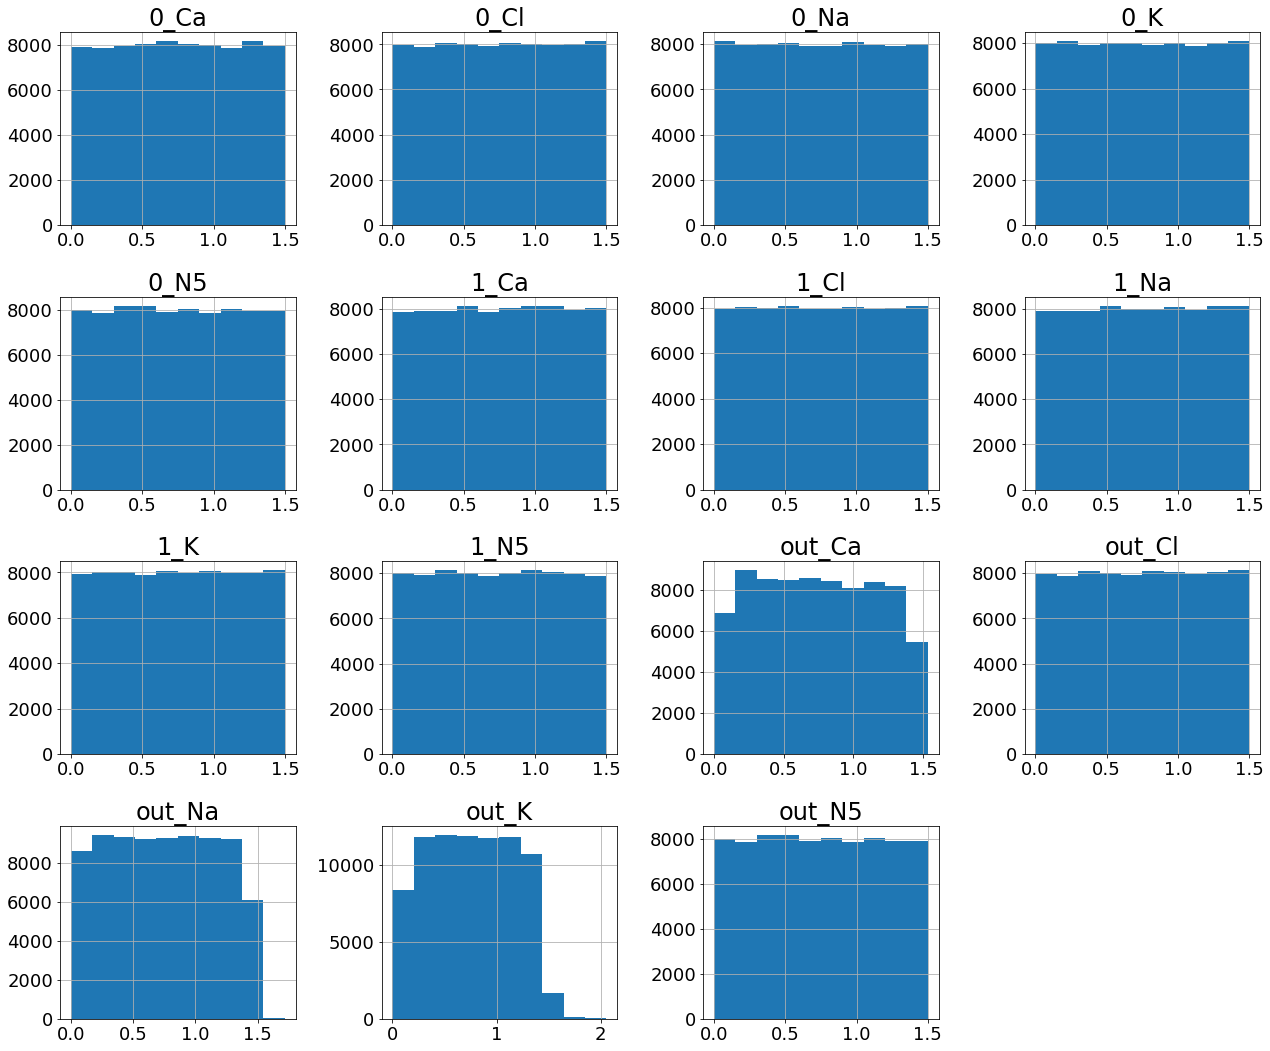

In [8]:
trainset.hist(figsize=(18, 15));
plt.tight_layout()

In [9]:
# split x and y
X_train = trainset.iloc[:, [0,2,3,5,7,8]].values 
y_train = trainset.iloc[:, [10, 12, 13]].values
X_test = testset.iloc[:, [0,2,3,5,7,8]].values 
y_test = testset.iloc[:, [10, 12, 13]].values

# Name variables
inputs = [list(trainset)[i] for i in [0,2,3,5,7,8]] 
outputs = [list(trainset)[i] for i in [10, 12, 13]] # do not work for list -> list(trainset)[10, 12, 13]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [11]:
print('Inputs: ', inputs)
print('Outputs: ', outputs)
print('X_train instances: ', X_train.shape)
print('X_test instances: ', X_test.shape)
print('X_val instances: ', X_val.shape)
print('y_train instances: ', y_train.shape)
print('y_test instances: ', y_test.shape)
print('y_val instances: ', y_val.shape)

Inputs:  ['0_Ca', '0_Na', '0_K', '1_Ca', '1_Na', '1_K']
Outputs:  ['out_Ca', 'out_Na', 'out_K']
X_train instances:  (64000, 6)
X_test instances:  (20000, 6)
X_val instances:  (16000, 6)
y_train instances:  (64000, 3)
y_test instances:  (20000, 3)
y_val instances:  (16000, 3)


## Normalize data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

norm_pipeline = Pipeline([
        ('minmax_scaler', MinMaxScaler((-1,1))),
    ])

X_train_norm = norm_pipeline.fit_transform(X_train)
X_test_norm = norm_pipeline.transform(X_test)
X_val_norm = norm_pipeline.transform(X_val)

In [13]:
a = norm_pipeline['minmax_scaler']
a.data_max_

array([1.49997587, 1.49999182, 1.49999116, 1.49997541, 1.49999112,
       1.49998768])

In [14]:
a.data_min_

array([2.40311919e-05, 4.88878123e-07, 2.50729397e-06, 1.07587663e-06,
       7.33135675e-06, 1.21962831e-05])

# FT-Transformer

https://github.com/Yura52/rtdl (FT-Transformer)

https://yura52.github.io/delu/stable/index.html (zero changed to delu)

In [15]:
# Requirements:
!pip install rtdl
!pip install libzero==0.0.4

In [16]:
import rtdl
import torch
import torch.nn as nn
import torch.nn.functional as F
import zero

/home/viluiz/anaconda3/envs/py3ml2-tab/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
print('torch.cuda.is_available:\t',torch.cuda.is_available())
print('torch.cuda.device_count:\t',torch.cuda.device_count())
print('torch.cuda.current_device:\t',torch.cuda.current_device())
print('torch.cuda.device:\t\t',torch.cuda.device(0))
print('torch.cuda.get_device_name:\t',torch.cuda.get_device_name(0))

torch.cuda.is_available:	 True
torch.cuda.device_count:	 1
torch.cuda.current_device:	 0
torch.cuda.device:		 <torch.cuda.device object at 0x7f772cdfdee0>
torch.cuda.get_device_name:	 Quadro RTX 4000


In [18]:
#device = torch.device('cpu')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Docs: https://yura52.github.io/zero/0.0.4/reference/api/zero.improve_reproducibility.html
zero.improve_reproducibility(seed=123456)

123456

In [19]:
X_train_norm = torch.tensor(X_train_norm.astype('float32')).to(device)
X_test_norm = torch.tensor(X_test_norm.astype('float32')).to(device)
X_val_norm = torch.tensor(X_val_norm.astype('float32')).to(device)
y_train = torch.tensor(y_train.astype('float32')).to(device)
y_test = torch.tensor(y_test.astype('float32')).to(device)
y_val = torch.tensor(y_val.astype('float32')).to(device)

In [20]:
# Best parameters from Gridsearch_FT-transformer.ipynb
model = rtdl.FTTransformer.make_baseline(
            n_num_features=X_train.shape[1],
            cat_cardinalities=None,
            last_layer_query_idx=[-1], 
            d_token=192, #192,
            n_blocks=3, #3,
            ffn_d_hidden=256,
            attention_dropout=0.1, #0.2,
            ffn_dropout=0.2, #0.1,
            residual_dropout=0.0,
            d_out=y_train.shape[1])
model.to(device)

optimizer = model.make_default_optimizer()
loss_fn = F.mse_loss

#def apply_model(x_num, x_cat=None):
#        return model(x_num, x_cat)
    
@torch.no_grad()
def evaluate(X,y):
    
    model.eval()
    prediction = []
    for batch in zero.iter_batches(X, 1024):
        #batch.to(device)
        prediction.append(model(batch,None))
    prediction = torch.cat(prediction).squeeze(1).cpu().numpy()
    target = y.cpu().numpy()

    score = np.sqrt(sklearn.metrics.mean_squared_error(target, prediction))
    
    return score

In [21]:
# Create a dataloader for batches of indices
# Docs: https://yura52.github.io/zero/reference/api/zero.data.IndexLoader.html
batch_size = 256
train_loader = zero.data.IndexLoader(len(X_train_norm), batch_size)

# Create a progress tracker for early stopping
# Docs: https://yura52.github.io/zero/reference/api/zero.ProgressTracker.html
progress = zero.ProgressTracker(patience=200)

In [22]:
n_epochs = 500
checkpoint_path = 'checkpoint.pt' 
#report_frequency = len(X_train_norm) // batch_size // 3

for epoch in range(1, n_epochs + 1):
    start = time.time()
    model.train()
    for iteration, batch_idx in enumerate(train_loader):
        
        x_batch = X_train_norm[batch_idx]
        y_batch = y_train[batch_idx]
        loss = loss_fn(model(x_batch,None).squeeze(1), y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #if iteration % report_frequency == 0:
        #    print(f'(epoch) {epoch} (batch) {iteration} (loss) {loss.item():.4f}')
    
    val_score = evaluate(X_val_norm, y_val)
    test_score = evaluate(X_test_norm, y_test)
    print(f'Epoch {epoch:03d} | Validation score: {val_score:.4f} | Test score: {test_score:.4f} | {time.time()-start:.1f}s', end='')
    progress.update(-val_score)
    if progress.success:
        print(' <<< BEST VALIDATION EPOCH', end='')
        torch.save({'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss,},
                    checkpoint_path)
    print()
    if progress.fail or epoch == n_epochs:
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']
        val_score = evaluate(X_val_norm, y_val)
        test_score = evaluate(X_test_norm, y_test)
        print('Checkpoint recovered:')
        print(f'Epoch {epoch:03d} | Validation score: {val_score:.4f} | Test score: {test_score:.4f} | {time.time()-start:.1f}s', end='')
        break

Epoch 001 | Validation score: 0.0444 | Test score: 0.0444 | 5.0s <<< BEST VALIDATION EPOCH
Epoch 002 | Validation score: 0.0411 | Test score: 0.0410 | 4.2s <<< BEST VALIDATION EPOCH
Epoch 003 | Validation score: 0.0337 | Test score: 0.0336 | 4.2s <<< BEST VALIDATION EPOCH
Epoch 004 | Validation score: 0.0286 | Test score: 0.0286 | 4.0s <<< BEST VALIDATION EPOCH
Epoch 005 | Validation score: 0.0231 | Test score: 0.0232 | 4.0s <<< BEST VALIDATION EPOCH
Epoch 006 | Validation score: 0.0227 | Test score: 0.0228 | 4.0s <<< BEST VALIDATION EPOCH
Epoch 007 | Validation score: 0.0194 | Test score: 0.0196 | 4.1s <<< BEST VALIDATION EPOCH
Epoch 008 | Validation score: 0.0182 | Test score: 0.0184 | 4.0s <<< BEST VALIDATION EPOCH
Epoch 009 | Validation score: 0.0164 | Test score: 0.0166 | 3.9s <<< BEST VALIDATION EPOCH
Epoch 010 | Validation score: 0.0168 | Test score: 0.0170 | 3.9s
Epoch 011 | Validation score: 0.0156 | Test score: 0.0159 | 3.9s <<< BEST VALIDATION EPOCH
Epoch 012 | Validation sc

Epoch 119 | Validation score: 0.0055 | Test score: 0.0056 | 4.0s
Epoch 120 | Validation score: 0.0072 | Test score: 0.0068 | 4.0s
Epoch 121 | Validation score: 0.0045 | Test score: 0.0044 | 3.9s
Epoch 122 | Validation score: 0.0054 | Test score: 0.0052 | 4.1s
Epoch 123 | Validation score: 0.0040 | Test score: 0.0042 | 4.1s <<< BEST VALIDATION EPOCH
Epoch 124 | Validation score: 0.0071 | Test score: 0.0066 | 4.0s
Epoch 125 | Validation score: 0.0091 | Test score: 0.0085 | 4.0s
Epoch 126 | Validation score: 0.0090 | Test score: 0.0082 | 4.2s
Epoch 127 | Validation score: 0.0078 | Test score: 0.0075 | 4.2s
Epoch 128 | Validation score: 0.0078 | Test score: 0.0073 | 4.2s
Epoch 129 | Validation score: 0.0091 | Test score: 0.0086 | 4.1s
Epoch 130 | Validation score: 0.0039 | Test score: 0.0038 | 4.0s <<< BEST VALIDATION EPOCH
Epoch 131 | Validation score: 0.0095 | Test score: 0.0092 | 4.2s
Epoch 132 | Validation score: 0.0099 | Test score: 0.0096 | 4.2s
Epoch 133 | Validation score: 0.0063 |

Epoch 244 | Validation score: 0.0128 | Test score: 0.0126 | 4.0s
Epoch 245 | Validation score: 0.0068 | Test score: 0.0064 | 4.0s
Epoch 246 | Validation score: 0.0045 | Test score: 0.0044 | 4.0s
Epoch 247 | Validation score: 0.0097 | Test score: 0.0094 | 4.0s
Epoch 248 | Validation score: 0.0038 | Test score: 0.0037 | 4.0s
Epoch 249 | Validation score: 0.0104 | Test score: 0.0103 | 4.0s
Epoch 250 | Validation score: 0.0046 | Test score: 0.0044 | 4.0s
Epoch 251 | Validation score: 0.0065 | Test score: 0.0060 | 4.1s
Epoch 252 | Validation score: 0.0045 | Test score: 0.0044 | 4.2s
Epoch 253 | Validation score: 0.0120 | Test score: 0.0118 | 4.3s
Epoch 254 | Validation score: 0.0055 | Test score: 0.0053 | 4.2s
Epoch 255 | Validation score: 0.0045 | Test score: 0.0043 | 4.1s
Epoch 256 | Validation score: 0.0070 | Test score: 0.0069 | 4.0s
Epoch 257 | Validation score: 0.0060 | Test score: 0.0058 | 4.1s
Epoch 258 | Validation score: 0.0044 | Test score: 0.0045 | 4.2s
Epoch 259 | Validation sc

Epoch 370 | Validation score: 0.0061 | Test score: 0.0060 | 4.1s
Epoch 371 | Validation score: 0.0061 | Test score: 0.0061 | 4.2s
Epoch 372 | Validation score: 0.0092 | Test score: 0.0093 | 4.1s
Epoch 373 | Validation score: 0.0085 | Test score: 0.0087 | 4.0s
Epoch 374 | Validation score: 0.0039 | Test score: 0.0040 | 4.0s
Epoch 375 | Validation score: 0.0056 | Test score: 0.0054 | 4.3s
Epoch 376 | Validation score: 0.0056 | Test score: 0.0056 | 4.5s
Epoch 377 | Validation score: 0.0058 | Test score: 0.0058 | 4.2s
Epoch 378 | Validation score: 0.0040 | Test score: 0.0040 | 4.0s
Epoch 379 | Validation score: 0.0046 | Test score: 0.0046 | 4.0s
Epoch 380 | Validation score: 0.0052 | Test score: 0.0051 | 4.0s
Epoch 381 | Validation score: 0.0058 | Test score: 0.0056 | 4.0s
Epoch 382 | Validation score: 0.0065 | Test score: 0.0064 | 4.0s
Epoch 383 | Validation score: 0.0078 | Test score: 0.0074 | 4.2s
Epoch 384 | Validation score: 0.0048 | Test score: 0.0049 | 4.0s
Epoch 385 | Validation sc

In [23]:
device = torch.device('cpu')
model.to(device)
model.eval()
X_train_norm =  X_train_norm.to(device)
X_test_norm = X_test_norm.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

start = time.time()
y_train_pred = model(X_train_norm,None).detach().numpy()
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_train, y_train_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_train, y_train_pred)
print('mae: ',mae)

r2_model = r2_score(y_train, y_train_pred)
print('\nR2: ',r2_model)

time =  -4.9076454639434814

mse:  5.2904647e-06
rmse:  0.002300101
mae:  0.0012475593

R2:  0.9999692343874519


In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

start = time.time()
y_test_pred = model(X_test_norm,None).detach().numpy()
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_test, y_test_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_test, y_test_pred)
print('mae: ',mae)

r2_model = r2_score(y_test, y_test_pred)
print('\nR2: ',r2_model)

time =  -1.8174176216125488

mse:  1.2301604e-05
rmse:  0.0035073643
mae:  0.0012967548

R2:  0.9999274539889341


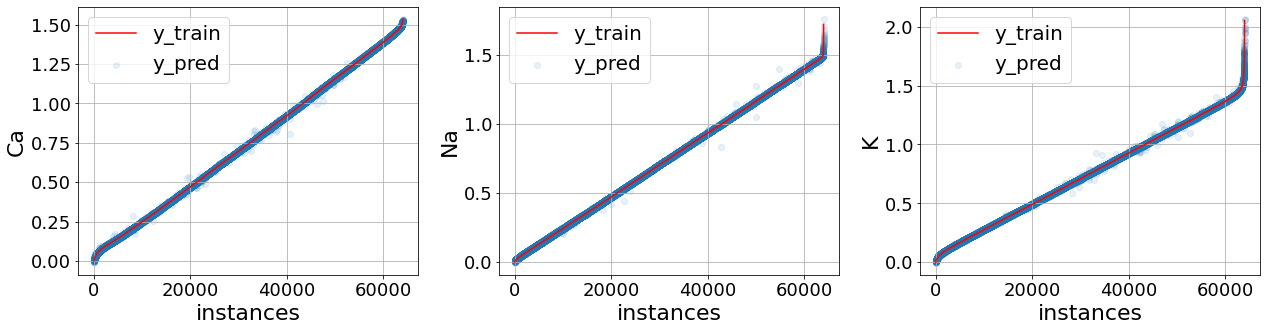

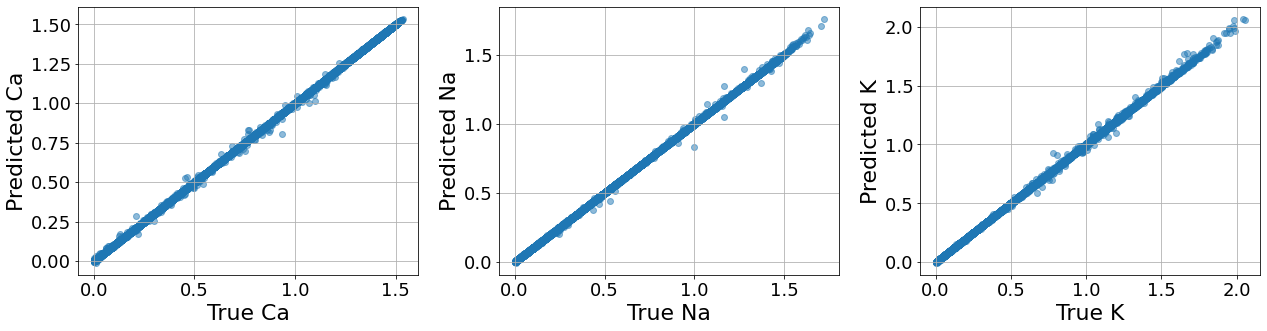

In [26]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_train[:,i]
    aux_pred = y_train_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_train[:,i], y_train_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

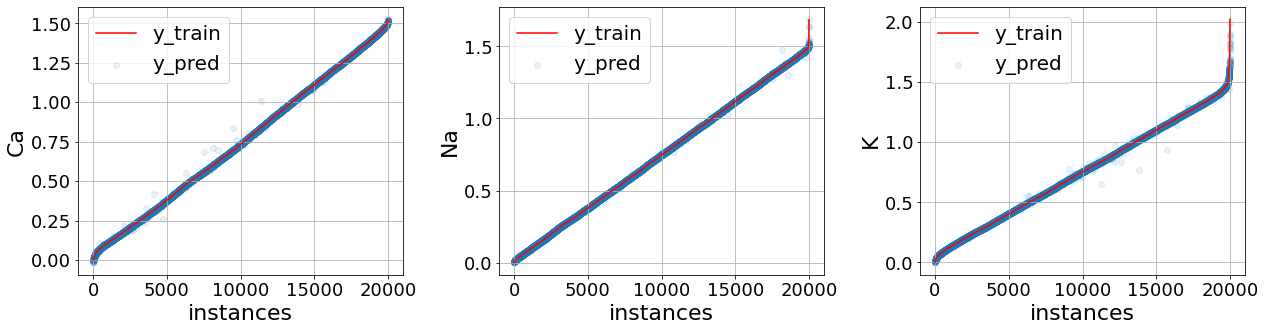

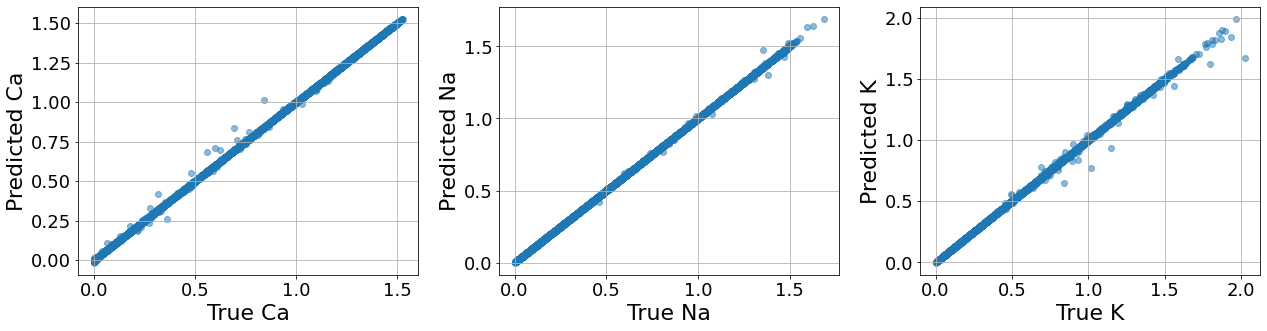

In [27]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_test[:,i]
    aux_pred = y_test_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_test[:,i], y_test_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

## Checking charge constraint

In [28]:
charge_in = 2*X_train[:, 0]+X_train[:, 1]+X_train[:, 2]
charge_out = 2*y_train_pred[:, 0]+y_train_pred[:, 1]+y_train_pred[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.002775893991774863

In [29]:
charge_in = 2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]
charge_out = 2*y_test_pred[:, 0]+y_test_pred[:, 1]+y_test_pred[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.002781597609223447

## Run time

In [30]:
start = time.time()
for i in range(1000):  
    model(X_test_norm[0:1],None)
end = time.time()
print("time = ", (start - end)/1000)
print()

time =  -0.006505329608917237



## Model persistence

In [ ]:
device = torch.device('cpu')
X_test = torch.tensor(X_test.astype('float32')).to(device) if not torch.is_tensor(X_test) else X_test
X_test_norm = torch.tensor(X_test_norm.astype('float32')).to(device) if not torch.is_tensor(X_test_norm) else X_test_norm
y_test = torch.tensor(y_test.astype('float32')).to(device) if not torch.is_tensor(y_test) else y_test

In [ ]:
import torch
import joblib
from sklearn.metrics import mean_squared_error

# Save and load the model
torch.save(model, 'FT-Tranformer.pt')
model_l = torch.load('FT-Tranformer.pt')

# Set up the model 
model_l.to(device)
model_l.eval()

# Save and load the normalization
joblib.dump(norm_pipeline, "norm_pipeline.pkl") 
xnorm = joblib.load("norm_pipeline.pkl")


print('rmse: ', np.sqrt(mean_squared_error(y_test, 
                model_l(X_test_norm,None).detach().numpy())))

rmse:  0.0035073643


In [ ]:
# Add Physics-constrained

y_test_pred = model_l(X_test_norm,None)
y_test_pred = (y_test_pred.T*(2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]) \
                         /(2*y_test_pred[:, 0]+y_test_pred[:, 1]+y_test_pred[:, 2])).T
print('rmse: ', np.sqrt(mean_squared_error(y_test.detach().numpy(), y_test_pred.detach().numpy())))

rmse:  0.0035073643


In [ ]:
start = time.time()
model_l = torch.load('FT-Tranformer.pt')
model_l.to(device)
model_l.eval()
xnorm = joblib.load("norm_pipeline.pkl")
end_load = time.time()
print('Load time = ', end_load - start)
start = time.time()
for i in range(1000):   
    X_norm = torch.tensor(xnorm.transform(X_test[0:1]).astype('float32')).to(device)
    y_pred = model_l(X_norm,None).detach().numpy()
print('Prediction time = ', (time.time() - start)/1000)
#print(y_pred)
start = time.time()
for i in range(1000):   
    X_norm = torch.tensor(xnorm.transform(X_test[0:1000]).astype('float32')).to(device)
    y_pred = model_l(X_norm,None).detach().numpy()
print('Prediction time 1000 = ', (time.time() - start)/1000)
start = time.time()
for i in range(1000):   
    X_norm = torch.tensor(xnorm.transform(X_test[0:10000]).astype('float32')).to(device)
    y_pred = model_l(X_norm,None).detach().numpy()
print('Prediction time 10,000 = ', (time.time() - start)/1000)

Load time =  0.00639653205871582
Prediction time =  0.0021944239139556885
Prediction time 1000 =  0.036382479429244996
Prediction time 10,000 =  0.389915593624115


## GPU

In [ ]:
device = torch.device('cuda:0')
X_test = torch.tensor(X_test.astype('float32')).to(device) if not torch.is_tensor(X_test) else X_test
X_test_norm = torch.tensor(X_test_norm.astype('float32')).to(device) if not torch.is_tensor(X_test_norm) else X_test_norm
y_test = torch.tensor(y_test.astype('float32')).to(device) if not torch.is_tensor(y_test) else y_test

In [ ]:
start = time.time()
model_l = torch.load('FT-Tranformer.pt')
model_l.to(device)
model_l.eval()
xnorm = joblib.load("norm_pipeline.pkl")
end_load = time.time()
print('Load time = ', end_load - start)
start = time.time()
for i in range(1000):   
    X_norm = torch.tensor(xnorm.transform(X_test[0:1]).astype('float32')).to(device)
    y_pred = model_l(X_norm,None).detach().cpu().numpy()
print('Prediction time = ', (time.time() - start)/1000)
#print(y_pred)
start = time.time()
for i in range(1000):   
    X_norm = torch.tensor(xnorm.transform(X_test[0:1000]).astype('float32')).to(device)
    y_pred = model_l(X_norm,None).detach().cpu().numpy()
print('Prediction time 1000 = ', (time.time() - start)/1000)
start = time.time()
for i in range(1000):   
    X_norm = torch.tensor(xnorm.transform(X_test[0:10000]).astype('float32')).to(device)
    y_pred = model_l(X_norm,None).detach().cpu().numpy()
print('Prediction time 10,000 = ', (time.time() - start)/1000)

Load time =  0.04578256607055664
Prediction time =  0.002175299644470215
Prediction time 1000 =  0.0055151376724243166
Prediction time 10,000 =  0.0466176688671112
